# Treinamento de modelo próprio para reconhecimento de texto manuscrito



In [21]:
try:
    import google.colab
    IN_COLAB = True
    print("Executando no Google Colab")
except ImportError:
    IN_COLAB = False
    print("Não executando no Google Colab")

Não executando no Google Colab


In [22]:
if IN_COLAB:
    # Baixar imagens para o laboratório.
    !wget https://github.com/fabiobento/ocr-sis-emb-2024-2/raw/refs/heads/main/imagens.zip
    !unzip -n -q imagens.zip

# Importando as bibliotecas

In [23]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [151]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
if IN_COLAB:
    from google.colab.patches import cv2_imshow

In [25]:
# Definir função para exibição de imagens
def imshow(imagem):
    if IN_COLAB:
        cv2_imshow(imagem)
    else:
        # Exibir a imagem com matplotlib
        if len(imagem.shape) == 2:  # Se a imagem tiver apenas 2 dimensões (níveis de cinza)
            plt.imshow(imagem, cmap='gray')
            plt.axis('off')  # Oculta os eixos
            plt.show()               
        else:
            plt.imshow(imagem)        
            plt.axis('off')  # Oculta os eixos
            plt.show()   

# Carregando as bases de dados

## Conjunto MNIST 0-9

In [26]:
from tensorflow.keras.datasets import mnist

In [27]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [28]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
28 * 28

784

In [30]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [31]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
train_data[0].shape

(28, 28)

In [33]:
train_labels[0]

5

In [34]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [35]:
digitos_data.shape

(70000, 28, 28)

In [36]:
digitos_labels.shape

(70000,)

In [37]:
digitos_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [38]:
np.random.randint(0, digitos_data.shape[0])

12177

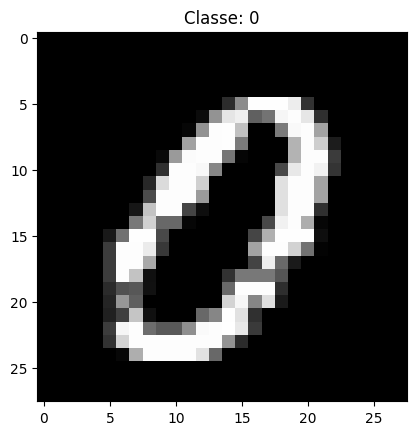

In [39]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

<Axes: ylabel='count'>

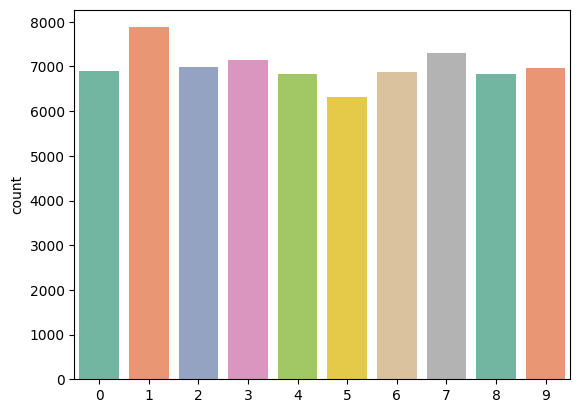

In [146]:
sns.countplot(x=digitos_labels,hue=digitos_labels, palette="Set2", legend=False)

## Conjunto Kaggle A-Z

In [42]:
if IN_COLAB:
  # Baixar imagens do conjunto de dados
  %pip install gdown
  !gdown --id 1udg4POqbFlozb9OemBNYKw4prQ4Dmh9s -O alfabeto_A-Z.zip
  !unzip -n -q alfabeto_A-Z.zip

In [43]:
dataset_az = pd.read_csv('./Datasets/A_Z Handwritten Data.csv').astype('float32')

In [44]:
#dataset_az

In [45]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [46]:
alfabeto_data.shape, alfabeto_labels.shape

((372450, 784), (372450,))

In [47]:
#alfabeto_labels

In [48]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [49]:
alfabeto_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Classe 13.0')

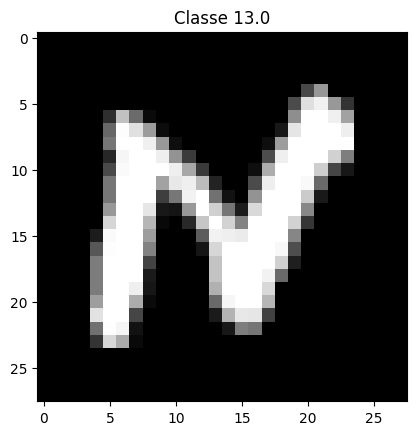

In [50]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]))

<Axes: xlabel='0', ylabel='count'>

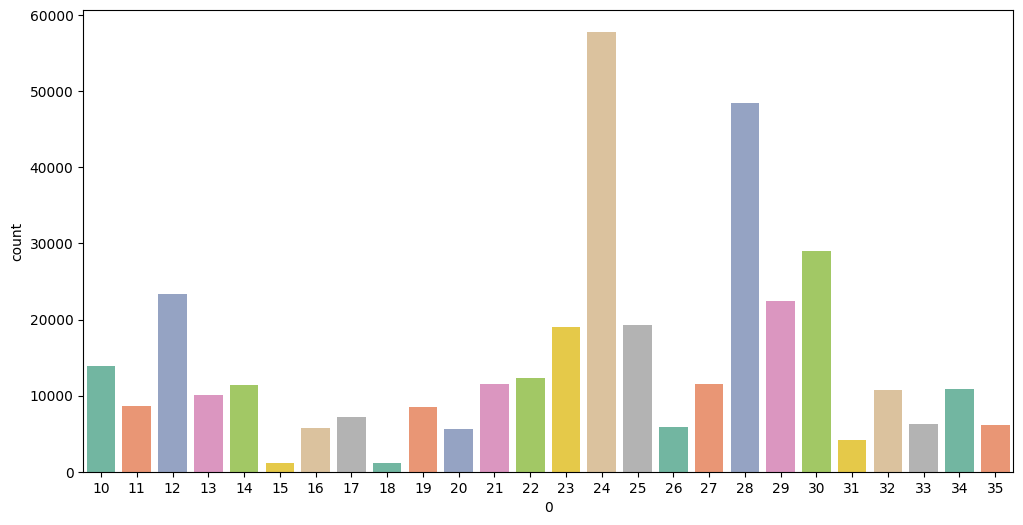

In [144]:
alfabeto_labels_int = alfabeto_labels.astype(int)
plt.figure(figsize=(12, 6))
sns.countplot(x=alfabeto_labels_int,hue=alfabeto_labels_int, palette="Set2", legend=False)

## Junção das bases de dados

In [52]:
digitos_labels, np.unique(digitos_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [53]:
alfabeto_labels, np.unique(alfabeto_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [54]:
alfabeto_labels += 10

In [55]:
alfabeto_labels, np.unique(alfabeto_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [56]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [57]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [58]:
data = np.array(data, dtype='float32')

In [59]:
data.shape

(442450, 28, 28)

In [60]:
data = np.expand_dims(data, axis = -1)

In [61]:
data.shape

(442450, 28, 28, 1)

# Pré-processamento dos dados

In [62]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [63]:
data /= 255.0

In [64]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [65]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [66]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [67]:
np.unique(labels)

array([0, 1])

In [68]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
labels[30000], len(labels[30000]), 26 + 10

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36,
 36)

In [71]:
# OneHotEncoder
# A, B, C, Z
# 0, 1, 2, 25

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [72]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [73]:
classes_total.max()

57825

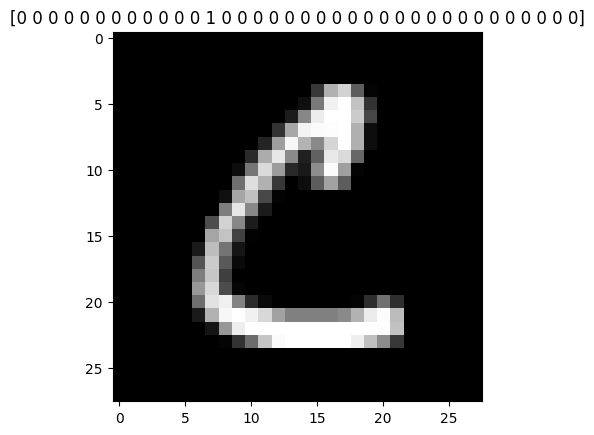

In [74]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [75]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [76]:
classes_peso

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [78]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [79]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Criação da estrutura da rede neural

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [83]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727532614.260552     608 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727532614.303583     608 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727532614.306670     608 cuda_executor.cc:

In [84]:
2 * 2 * 128

512

In [85]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,468 (540.89 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [87]:
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Treinamento da rede neural

In [88]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [89]:
checkpointer = ModelCheckpoint(arquivo_modelo + '.keras', monitor='val_loss', verbose=1, save_best_only=True) 

In [90]:
len(X_train) // batch_size

2765

In [91]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727532615.544486    2165 service.cc:146] XLA service 0x7c8ab800c310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727532615.544507    2165 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-09-28 14:10:15.582170: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 14:10:15.758364: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906
2024-09-28 14:10:16.543974

  15/2765 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.0566 - loss: 16.5026

I0000 00:00:1727532619.576779    2165 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2757/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7123 - loss: 4.1464
Epoch 1: val_loss improved from inf to 0.25366, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.7127 - loss: 4.1400 - val_accuracy: 0.9010 - val_loss: 0.2537
Epoch 2/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8672 - loss: 1.3470

2024-09-28 14:11:01.562008: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-28 14:11:01.562050: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 14:11:01.562071: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:11:01.562091: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, trac


Epoch 2: val_loss improved from 0.25366 to 0.24033, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.8672 - loss: 1.3470 - val_accuracy: 0.9072 - val_loss: 0.2403
Epoch 3/20
2758/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8980 - loss: 1.0519
Epoch 3: val_loss improved from 0.24033 to 0.22957, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.8980 - loss: 1.0517 - val_accuracy: 0.9073 - val_loss: 0.2296
Epoch 4/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9141 - loss: 0.6896

2024-09-28 14:11:40.873157: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]



Epoch 4: val_loss improved from 0.22957 to 0.22053, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step - accuracy: 0.9141 - loss: 0.6896 - val_accuracy: 0.9136 - val_loss: 0.2205
Epoch 5/20
2760/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9109 - loss: 0.8463
Epoch 5: val_loss improved from 0.22053 to 0.17883, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9109 - loss: 0.8462 - val_accuracy: 0.9351 - val_loss: 0.1788
Epoch 6/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9297 - loss: 0.6911

2024-09-28 14:12:19.106321: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:12:19.106358: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 6: val_loss improved from 0.17883 to 0.17707, saving model to manuscrito.model.keras
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - accuracy: 0.9297 - loss: 0.6911 - val_accuracy: 0.9359 - val_loss: 0.1771
Epoch 7/20
2760/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9199 - loss: 0.7486
Epoch 7: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9199 - loss: 0.7486 - val_accuracy: 0.8805 - val_loss: 0.2604
Epoch 8/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8906 - loss: 0.5083

2024-09-28 14:12:58.386947: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 14:12:58.386987: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5765903383460205332
2024-09-28 14:12:58.386997: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:12:58.387012: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 8: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 698us/step - accuracy: 0.8906 - loss: 0.5083 - val_accuracy: 0.8865 - val_loss: 0.2463
Epoch 9/20
2759/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9241 - loss: 0.6870
Epoch 9: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9241 - loss: 0.6870 - val_accuracy: 0.8883 - val_loss: 0.2564
Epoch 10/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9141 - loss: 0.6753

2024-09-28 14:13:37.704228: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:13:37.704254: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 10: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 687us/step - accuracy: 0.9141 - loss: 0.6753 - val_accuracy: 0.8795 - val_loss: 0.2783
Epoch 11/20
2764/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9289 - loss: 0.6272
Epoch 11: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9289 - loss: 0.6272 - val_accuracy: 0.8939 - val_loss: 0.2593
Epoch 12/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9375 - loss: 0.5855

2024-09-28 14:14:16.934641: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:14:16.934680: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 12: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.9375 - loss: 0.5855 - val_accuracy: 0.8895 - val_loss: 0.2713
Epoch 13/20
2757/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9313 - loss: 0.5950
Epoch 13: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9313 - loss: 0.5950 - val_accuracy: 0.9022 - val_loss: 0.2314
Epoch 14/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9297 - loss: 0.6009

2024-09-28 14:14:56.759594: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 14: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.9297 - loss: 0.6009 - val_accuracy: 0.9020 - val_loss: 0.2295
Epoch 15/20
2764/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9339 - loss: 0.5619
Epoch 15: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9339 - loss: 0.5619 - val_accuracy: 0.9066 - val_loss: 0.2242
Epoch 16/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9375 - loss: 0.3979

2024-09-28 14:15:35.167599: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]



Epoch 16: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.9375 - loss: 0.3979 - val_accuracy: 0.9121 - val_loss: 0.2134
Epoch 17/20
2759/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9366 - loss: 0.5275
Epoch 17: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9366 - loss: 0.5276 - val_accuracy: 0.8538 - val_loss: 0.3701
Epoch 18/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9453 - loss: 0.2639

2024-09-28 14:16:12.918388: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5765903383460205332
2024-09-28 14:16:12.918407: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3802046507611069636
2024-09-28 14:16:12.918414: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 18: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - accuracy: 0.9453 - loss: 0.2639 - val_accuracy: 0.8549 - val_loss: 0.3686
Epoch 19/20
2763/2765 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9377 - loss: 0.5217
Epoch 19: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9377 - loss: 0.5217 - val_accuracy: 0.8543 - val_loss: 0.3503
Epoch 20/20
   1/2765 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9062 - loss: 0.2508

2024-09-28 14:16:51.822388: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16060791353091858208



Epoch 20: val_loss did not improve from 0.17707
2765/2765 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - accuracy: 0.9062 - loss: 0.2508 - val_accuracy: 0.8555 - val_loss: 0.3459


# Avaliação da rede neural

In [92]:
X_test.shape

(88490, 28, 28, 1)

In [93]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

692/692 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [94]:
previsoes

array([[8.7628812e-01, 3.0361753e-07, 1.5263426e-07, ..., 9.2257053e-14,
        3.1868932e-08, 5.2095701e-09],
       [8.7522192e-19, 7.8214867e-08, 4.2863560e-10, ..., 2.0014305e-12,
        4.8523085e-14, 1.0708576e-08],
       [3.1616028e-09, 8.9941556e-09, 1.9492636e-09, ..., 1.6351459e-08,
        1.3797683e-07, 1.1652061e-10],
       ...,
       [6.9857520e-01, 1.6043494e-07, 3.8244618e-08, ..., 1.2769426e-13,
        2.4114220e-09, 1.0279503e-09],
       [7.4534424e-18, 5.4248025e-12, 1.0070809e-08, ..., 9.9999523e-01,
        9.6478891e-07, 1.4184919e-09],
       [2.8787968e-05, 7.4438504e-09, 5.4391763e-05, ..., 7.3511336e-10,
        6.0392739e-07, 3.6683818e-05]], dtype=float32)

In [95]:
previsoes[0]

array([8.7628812e-01, 3.0361753e-07, 1.5263426e-07, 1.7017355e-07,
       7.5214812e-09, 1.2477044e-06, 5.2229493e-06, 9.1335330e-08,
       3.2895807e-06, 4.3985924e-06, 6.4476801e-08, 3.5072617e-06,
       8.4808717e-06, 8.2405575e-05, 5.9086571e-09, 8.8002834e-12,
       1.4354443e-06, 5.6736438e-10, 4.6256987e-13, 2.7281635e-07,
       3.0356451e-09, 4.8472316e-08, 9.3319641e-10, 4.2416440e-07,
       1.2346169e-01, 2.9411853e-05, 1.0688907e-04, 1.8738854e-08,
       6.5339719e-07, 1.6603796e-08, 1.6004959e-06, 6.4115172e-11,
       4.7471511e-09, 9.2257053e-14, 3.1868932e-08, 5.2095701e-09],
      dtype=float32)

In [96]:
len(previsoes[0])

36

In [97]:
np.argmax(previsoes[0])

0

In [98]:
nomes_labels[24]

'O'

In [99]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
np.argmax(y_test[0])

24

In [101]:
nomes_labels[np.argmax(y_test[0])]

'O'

In [102]:
rede_neural.evaluate(X_test, y_test)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.8557 - loss: 0.3465


[0.34588873386383057, 0.8554865121841431]

In [103]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

              precision    recall  f1-score   support

           0       0.15      0.97      0.27      1381
           1       0.95      0.99      0.97      1575
           2       0.80      0.99      0.88      1398
           3       0.91      0.99      0.95      1428
           4       0.74      0.99      0.85      1365
           5       0.29      0.98      0.45      1263
           6       0.86      0.98      0.92      1375
           7       0.92      0.99      0.95      1459
           8       0.88      0.99      0.93      1365
           9       0.93      0.98      0.95      1392
           A       0.99      0.98      0.99      2774
           B       0.99      0.93      0.96      1734
           C       0.99      0.97      0.98      4682
           D       0.98      0.89      0.93      2027
           E       1.00      0.98      0.99      2288
           F       0.95      1.00      0.97       233
           G       0.99      0.85      0.91      1152
           H       0.98    

In [104]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

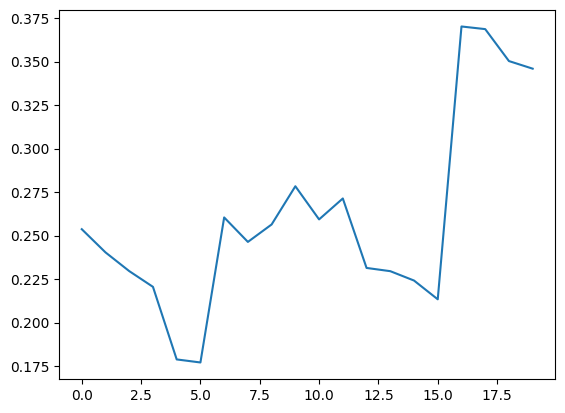

In [105]:
plt.plot(history.history['val_loss']);

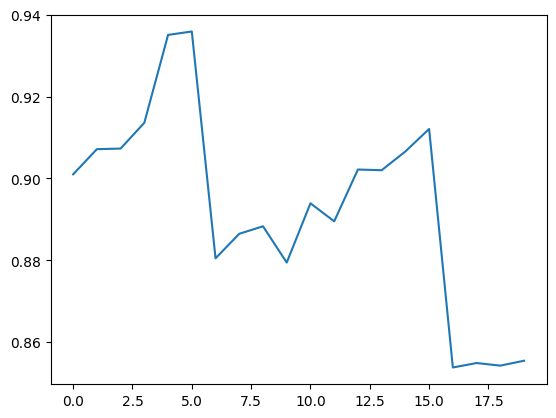

In [106]:
plt.plot(history.history['val_accuracy']);

# Salvando o modelo

In [148]:
rede_neural.save('rede_neural.keras')    
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    !cp rede_neural.keras /content/drive/MyDrive/sistemas_embarcados/rede_neural.keras

# Teste com imagens

In [149]:
from tensorflow.keras.models import load_model

In [150]:
rede_neural_carregada = load_model('rede_neural.keras')

In [110]:
rede_neural_carregada

<Sequential name=sequential, built=True>

In [111]:
rede_neural_carregada.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,406 (1.58 MB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276,938 (1.06 MB)

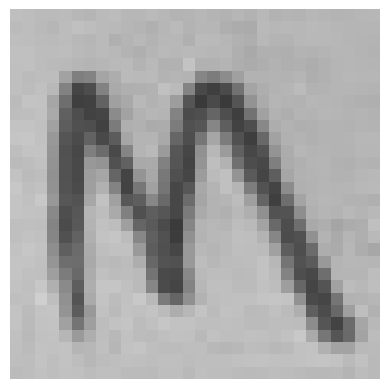

In [112]:
img = cv2.imread('./Imagens/letra-m.jpg')
imshow(img)

In [113]:
img.shape

(30, 30, 3)

In [114]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

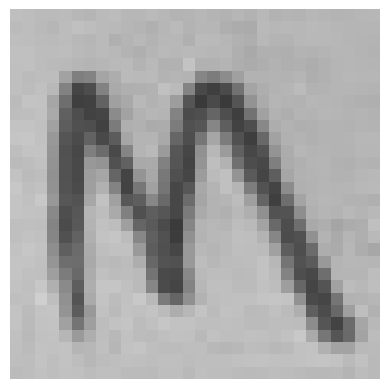

In [115]:
imshow(gray)

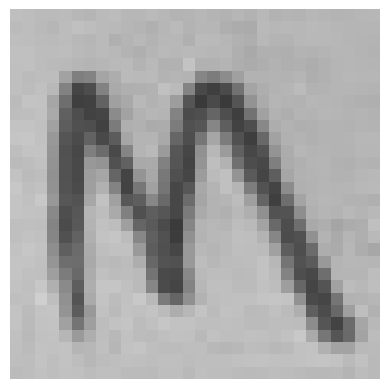

In [116]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imshow(thresh)

In [117]:
val

137.0

In [118]:
thresh.shape

(30, 30)

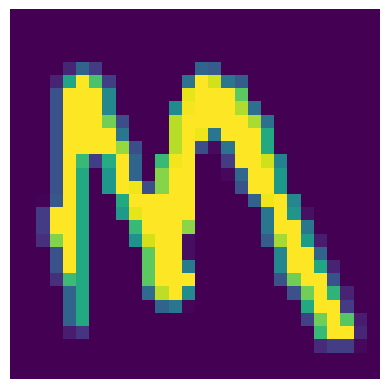

In [119]:
img = cv2.resize(thresh, (28, 28))
imshow(img)

In [120]:
img.shape

(28, 28)

In [121]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [122]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [123]:
previsao = rede_neural_carregada.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


In [124]:
previsao

array([[9.7549790e-09, 1.0503617e-09, 9.2970824e-14, 2.5186160e-12,
        5.6392593e-09, 1.8572667e-12, 6.0856392e-10, 9.4684758e-09,
        1.4715075e-12, 7.3665174e-10, 4.9379882e-08, 1.3251394e-10,
        4.3461587e-10, 5.8067275e-09, 1.2566614e-11, 2.5300715e-15,
        1.3849145e-10, 7.1981412e-07, 1.2127546e-18, 9.4288401e-14,
        8.1399214e-08, 2.4470631e-10, 9.9973112e-01, 2.5929295e-04,
        1.7003782e-09, 3.8575843e-10, 1.5046395e-09, 5.9788988e-08,
        1.6472734e-10, 7.4035813e-09, 4.9367451e-08, 2.0595792e-15,
        8.7282660e-06, 4.2997561e-09, 1.8692872e-11, 2.1766818e-11]],
      dtype=float32)

In [125]:
np.argmax(previsao)

22

In [126]:
nomes_labels[22]

'M'